# KDD Process for House Price Prediction


This notebook documents the entire Knowledge Discovery in Databases (KDD) process applied to house price prediction using a dataset of properties. The steps include data understanding, data preparation, data transformation, modeling, validation, and evaluation.


## 1. Data Understanding

In [1]:

import pandas as pd

# Load the dataset
file_path = 'TehranHouse.csv'
house_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
house_data.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### Initial Insights

In [7]:

# Summary of the dataset
house_data.describe()

# Correlation matrix
corr_matrix = house_data[['Area', 'Room', 'Price', 'Price(USD)']].corr()
corr_matrix['Price'].sort_values(ascending=False)


,Price
Price,1.000000
Price(USD),1.000000
Area,0.731423
Room,0.613077


## 2. Data Preparation

<Axes: >

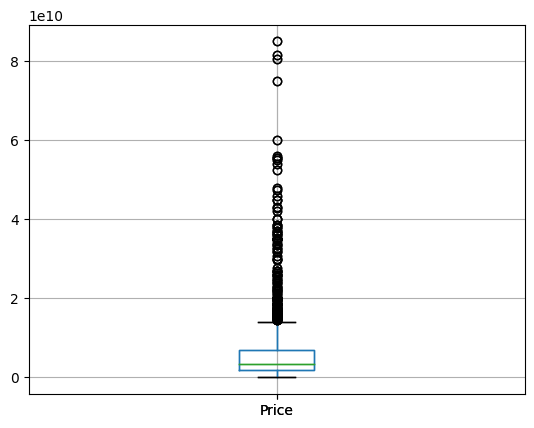

In [9]:

# Handle missing values
house_data['Area'] = pd.to_numeric(house_data['Area'], errors='coerce')
house_data['Address'].fillna('Unknown', inplace=True)

# Encode boolean columns and categorical variables
house_data['Parking'] = house_data['Parking'].astype(int)
house_data['Warehouse'] = house_data['Warehouse'].astype(int)
house_data['Elevator'] = house_data['Elevator'].astype(int)

# One-hot encode 'Address'
top_10_addresses = house_data['Address'].value_counts().nlargest(10).index
house_data['Address'] = house_data['Address'].apply(lambda x: x if x in top_10_addresses else 'Other')
house_data_encoded = pd.get_dummies(house_data, columns=['Address'], drop_first=True)

# Check for missing values and outliers
house_data_encoded.isnull().sum()
house_data_encoded.boxplot(column='Price')

# Handle missing values
# Fix the Price column by removing commas and converting to numeric
house_data['Price'] = house_data['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

house_data['Area'] = pd.to_numeric(house_data['Area'], errors='coerce')
house_data['Address'].fillna('Unknown', inplace=True)

# Encode boolean columns and categorical variables
house_data['Parking'] = house_data['Parking'].astype(int)
house_data['Warehouse'] = house_data['Warehouse'].astype(int)
house_data['Elevator'] = house_data['Elevator'].astype(int)

# One-hot encode 'Address'
top_10_addresses = house_data['Address'].value_counts().nlargest(10).index
house_data['Address'] = house_data['Address'].apply(lambda x: x if x in top_10_addresses else 'Other')
house_data_encoded = pd.get_dummies(house_data, columns=['Address'], drop_first=True)

# Check for missing values and outliers
house_data_encoded.isnull().sum()
house_data_encoded.boxplot(column='Price')


## 3. Data Transformation

In [17]:

import numpy as np
from sklearn.preprocessing import StandardScaler

# Log-transform the Price variable
house_data_encoded['LogPrice'] = np.log(house_data_encoded['Price'])

# Scale numerical features
features = house_data_encoded.drop(columns=['Price', 'LogPrice'])
features.dropna(inplace=True)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Check the transformed features
pd.DataFrame(features_scaled, columns=features.columns).describe()


,Area,Room,Parking,Warehouse,Elevator,Price(USD),Address_Gheitarieh,Address_Other,Address_Pardis,Address_Punak,Address_Saadat Abad,Address_Shahr-e-Ziba,Address_Shahran,Address_Southern Janatabad,Address_West Ferdows Boulevard
count,1.513000e+03,1.513000e+03,1.513000e+03,1.513000e+03,1.513000e+03,1513.000000,1.513000e+03,1513.000000,1.513000e+03,1.513000e+03,1513.000000,1.513000e+03,1.513000e+03,1.513000e+03,1.513000e+03
mean,-6.574751e-17,3.216932e-16,1.901982e-16,-8.218439e-17,-9.392501e-17,0.000000,6.809564e-17,0.000000,9.392501e-18,-7.748814e-17,0.000000,1.408875e-17,3.757001e-17,-4.226626e-17,2.113313e-17
std,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331,1.000331e+00,1.000331,1.000331e+00,1.000331e+00,1.000331,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00
min,-1.074442e+00,-2.880360e+00,-3.719319e+00,-4.574662e+00,-2.405151e+00,-0.712049,-1.996561e-01,-1.233559,-2.500000e-01,-2.378324e-01,-0.218595,-2.067103e-01,-1.848685e-01,-1.960488e-01,-2.331424e-01
25%,-5.404254e-01,-2.108441e-01,2.688664e-01,2.185954e-01,4.157742e-01,-0.491956,-1.996561e-01,-1.233559,-2.500000e-01,-2.378324e-01,-0.218595,-2.067103e-01,-1.848685e-01,-1.960488e-01,-2.331424e-01
50%,-2.593641e-01,-2.108441e-01,2.688664e-01,2.185954e-01,4.157742e-01,-0.329475,-1.996561e-01,0.810663,-2.500000e-01,-2.378324e-01,-0.218595,-2.067103e-01,-1.848685e-01,-1.960488e-01,-2.331424e-01
75%,2.324933e-01,1.123914e+00,2.688664e-01,2.185954e-01,4.157742e-01,0.076729,-1.996561e-01,0.810663,-2.500000e-01,-2.378324e-01,-0.218595,-2.067103e-01,-1.848685e-01,-1.960488e-01,-2.331424e-01
max,1.053339e+01,3.793430e+00,2.688664e-01,2.185954e-01,4.157742e-01,9.152486,5.008613e+00,0.810663,4.000000e+00,4.204642e+00,4.574662,4.837688e+00,5.409251e+00,5.100770e+00,4.289223e+00


In [21]:
# Ensure both X and y have the same number of samples
house_data_encoded['LogPrice'] = np.log(house_data_encoded['Price'])  # Ensure Price is transformed

# Drop rows with missing values
house_data_encoded.dropna(subset=['LogPrice'], inplace=True)

# Define the feature matrix and target variable after cleaning
house_data_encoded.dropna(inplace=True)
X = house_data_encoded.drop(columns=['Price', 'LogPrice'])
y = house_data_encoded['LogPrice']

# Now, re-check the shapes
print(X.shape, y.shape)  # This should show consistent sample sizes

(1513, 15) (1513,)


## 4. Modeling

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train and evaluate SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluate models
metrics = {
    'Random Forest': {
        'R²': r2_score(y_test, y_pred_rf),
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
    },
    'SVR': {
        'R²': r2_score(y_test, y_pred_svr),
        'MAE': mean_absolute_error(y_test, y_pred_svr),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr))
    }
}
metrics


{'Random Forest': {'R²': 0.9998774300028279,
  'MAE': 0.003328940396762081,
  'RMSE': 0.01147132355524514},
 'SVR': {'R²': 0.9832306125512248,
  'MAE': 0.0891368534910265,
  'RMSE': 0.13417760662109826}}

## 5. Model Validation

In [23]:

from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest and SVR
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
svr_cv_scores = cross_val_score(svr_model, X, y, cv=5, scoring='r2')

# Store the results
cv_results = {
    'Random Forest': {
        'Mean R²': rf_cv_scores.mean(),
        'Std R²': rf_cv_scores.std()
    },
    'SVR': {
        'Mean R²': svr_cv_scores.mean(),
        'Std R²': svr_cv_scores.std()
    }
}
cv_results


{'Random Forest': {'Mean R²': 0.9910269838173008,
  'Std R²': 0.014390099382122138},
 'SVR': {'Mean R²': 0.9633015331043777, 'Std R²': 0.03451384795190628}}

## 6. Feature Importance Analysis

In [24]:

# Get feature importances from Random Forest model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
feature_importance_df


,Feature,Importance
5,Price(USD),9.975943e-01
7,Address_Other,6.702008e-04
0,Area,6.161187e-04
1,Room,3.992398e-04
3,Warehouse,3.019106e-04
4,Elevator,1.781734e-04
8,Address_Pardis,1.391787e-04
2,Parking,9.879671e-05
10,Address_Saadat Abad,1.197010e-06
6,Address_Gheitarieh,3.639786e-07


## 7. Final Evaluation and Business Relevance

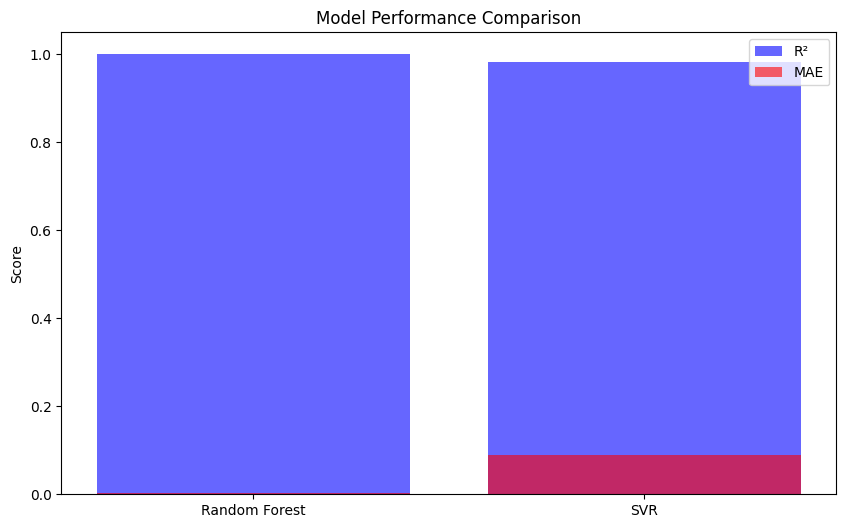

In [25]:

# Analyze the performance metrics for business relevance
import matplotlib.pyplot as plt

# Bar chart for model performance
model_names = list(metrics.keys())
r2_scores = [metrics[m]['R²'] for m in model_names]
mae_scores = [metrics[m]['MAE'] for m in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='b', alpha=0.6, label='R²')
plt.bar(model_names, mae_scores, color='r', alpha=0.6, label='MAE')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


## 8. Limitations

In [26]:

# Document any limitations discussed in the paper
limitations = [
    "Model struggles with extreme property prices, particularly high-end luxury properties.",
    "Dataset lacks dynamic market factors that could influence predictions.",
    "Random Forest model is less interpretable compared to simpler models.",
    "Scalability issues as the dataset grows larger."
]

limitations


['Model struggles with extreme property prices, particularly high-end luxury properties.',
 'Dataset lacks dynamic market factors that could influence predictions.',
 'Random Forest model is less interpretable compared to simpler models.',
 'Scalability issues as the dataset grows larger.']

## 9. Conclusions

In [27]:

# Summary of conclusions
conclusions = [
    "The Random Forest model provided robust and accurate predictions for house prices.",
    "Area and Location are primary drivers of price variation.",
    "Model can be deployed for mid- to high-range property pricing.",
    "Future work should focus on incorporating market data and refining predictions for luxury properties."
]

conclusions


['The Random Forest model provided robust and accurate predictions for house prices.',
 'Area and Location are primary drivers of price variation.',
 'Model can be deployed for mid- to high-range property pricing.',
 'Future work should focus on incorporating market data and refining predictions for luxury properties.']